In [1]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 18.5 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [61]:
pip install rtree

     |████████████████████████████████| 994 kB 4.2 MB/s 


In [31]:
import pandas as pd

import geopandas as gpd
import pydot
import cartopy
import libarchive

In [3]:
import matplotlib.pyplot as plt

In [4]:
nyco = gpd.read_file("/content/drive/MyDrive/Rezoning/nyco.shp")
nylh = gpd.read_file("/content/drive/MyDrive/Rezoning/nylh.shp")
nysp = gpd.read_file("/content/drive/MyDrive/Rezoning/nysp.shp")
nysp_sd = gpd.read_file("/content/drive/MyDrive/Rezoning/nysp_sd.shp")
nyzd = gpd.read_file("/content/drive/MyDrive/Rezoning/nyzd.shp")
nyzma = gpd.read_file("/content/drive/MyDrive/Rezoning/nyzma.shp")

In [63]:
import rtree

In [6]:
taxlot =pd.read_csv('/content/drive/MyDrive/Rezoning/taxlot/NY_ZoningTaxLotDB20210630.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8,9,10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
mergedZone= gpd.read_file("/content/drive/MyDrive/Rezoning/merged nyczone.shp")

In [8]:
boundaryDB= gpd.read_file("/content/drive/MyDrive/Rezoning/downtownBrooklyn boundary.shp")

In [135]:
zoneDB= gpd.read_file("/content/drive/MyDrive/Rezoning/clipedDB.shp")

In [136]:
amendment=zoneDB.loc[(zoneDB['layer']== 'nyzma')]
amendment.columns

Index(['OVERLAY', 'Shape_Leng', 'Shape_Area', 'LHNAME', 'LHLBL', 'SDNAME',
       'SDLBL', 'SPNAME', 'SPLBL', 'SUBDIST', 'SUB_AREA_N', 'SUBDIST_LB',
       'SUBAREA_LB', 'SUBAREA_OT', 'ZONEDIST', 'EFFECTIVE', 'STATUS',
       'ULURPNO', 'LUCATS', 'PROJECT_NA', 'layer', 'path', 'geometry'],
      dtype='object')

In [137]:
amendment=amendment[['EFFECTIVE', 'STATUS','ULURPNO', 'LUCATS', 'PROJECT_NA','Shape_Area','geometry']].sort_values(by=['EFFECTIVE'])

In [138]:
amendment= amendment.dropna(how='any',axis=0)

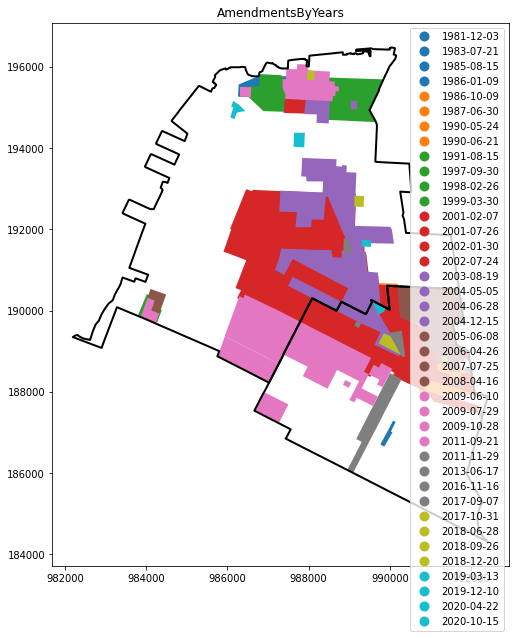

In [140]:
  fig, ax = plt.subplots(figsize = (10,10))
  plt.title('AmendmentsByYears')
  amendment.plot(column = 'EFFECTIVE',ax=ax,legend=True)
  boundaryDB.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

In [122]:
def mapPlot (data,title2, column):
  fig, ax = plt.subplots(figsize = (10,10))
  plt.title(title2)
  data.plot(column = column,ax=ax,legend=True)
  boundaryDB.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

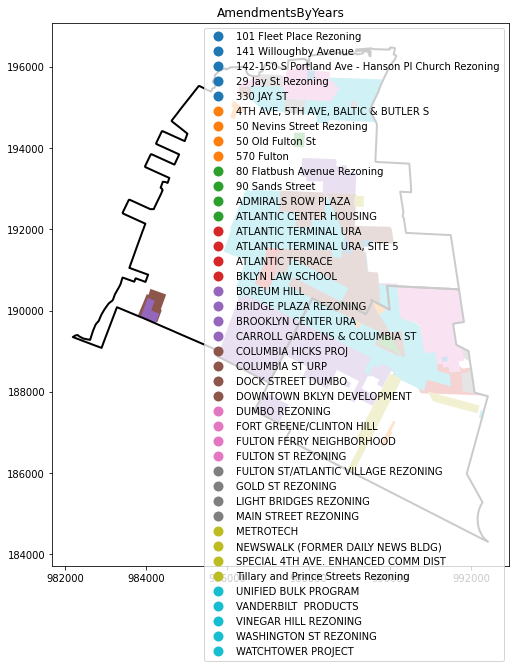

In [141]:
mapPlot(amendment,'AmendmentsByYears', 'PROJECT_NA')

In [131]:
nyco.head()

,OVERLAY,Shape_Leng,Shape_Area,geometry
0,C1-1,807.615046,40774.551643,"POLYGON ((1034212.932 247414.680, 1034211.762 ..."
1,C1-1,801.923787,40230.747052,"POLYGON ((1034487.326 247708.733, 1034483.963 ..."
2,C1-1,956.401990,47581.996189,"POLYGON ((1026514.576 249190.367, 1026542.980 ..."
3,C1-1,944.324030,47936.334496,"POLYGON ((1026229.896 249164.442, 1026243.201 ..."
4,C1-1,800.914396,40090.131658,"POLYGON ((1034471.777 247402.689, 1034470.740 ..."


In [52]:
dic = {'nysp':'SDNAME','nylh':'LHNAME','nyco':'OVERLAY','nysp_sd':'SPNAME'}

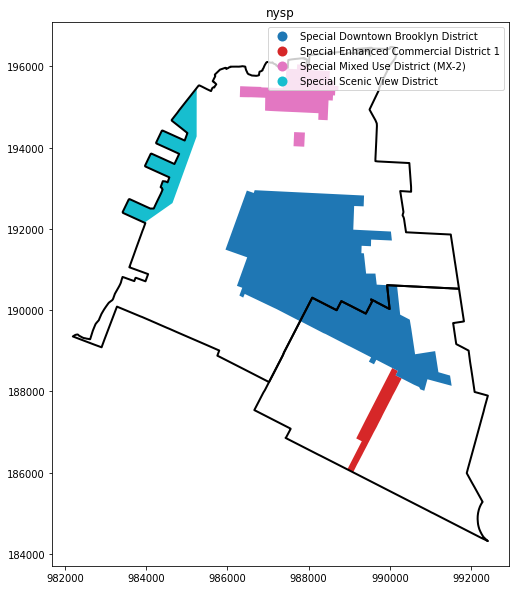

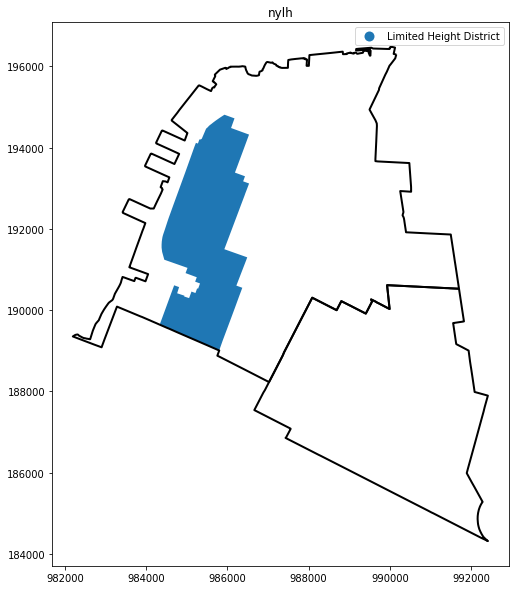

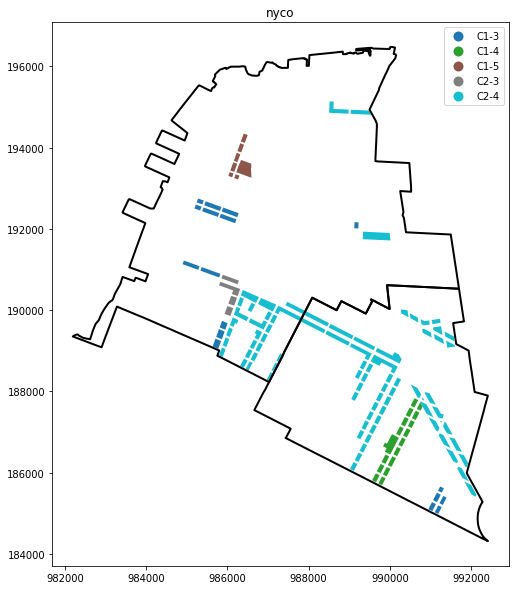

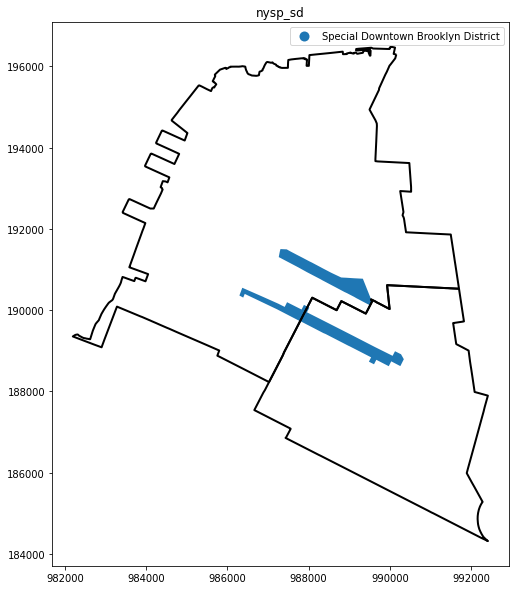

In [54]:
for i in dic:
  fig, ax = plt.subplots(figsize = (10,10))
  plt.title(i)
  zoneDB.loc[(zoneDB['layer']== i)].plot(column = dic[i],ax=ax,legend=True)
  boundaryDB.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

In [83]:
nyzd_cliped= gpd.clip(nyzd,boundaryDB)

ImportError: ignored

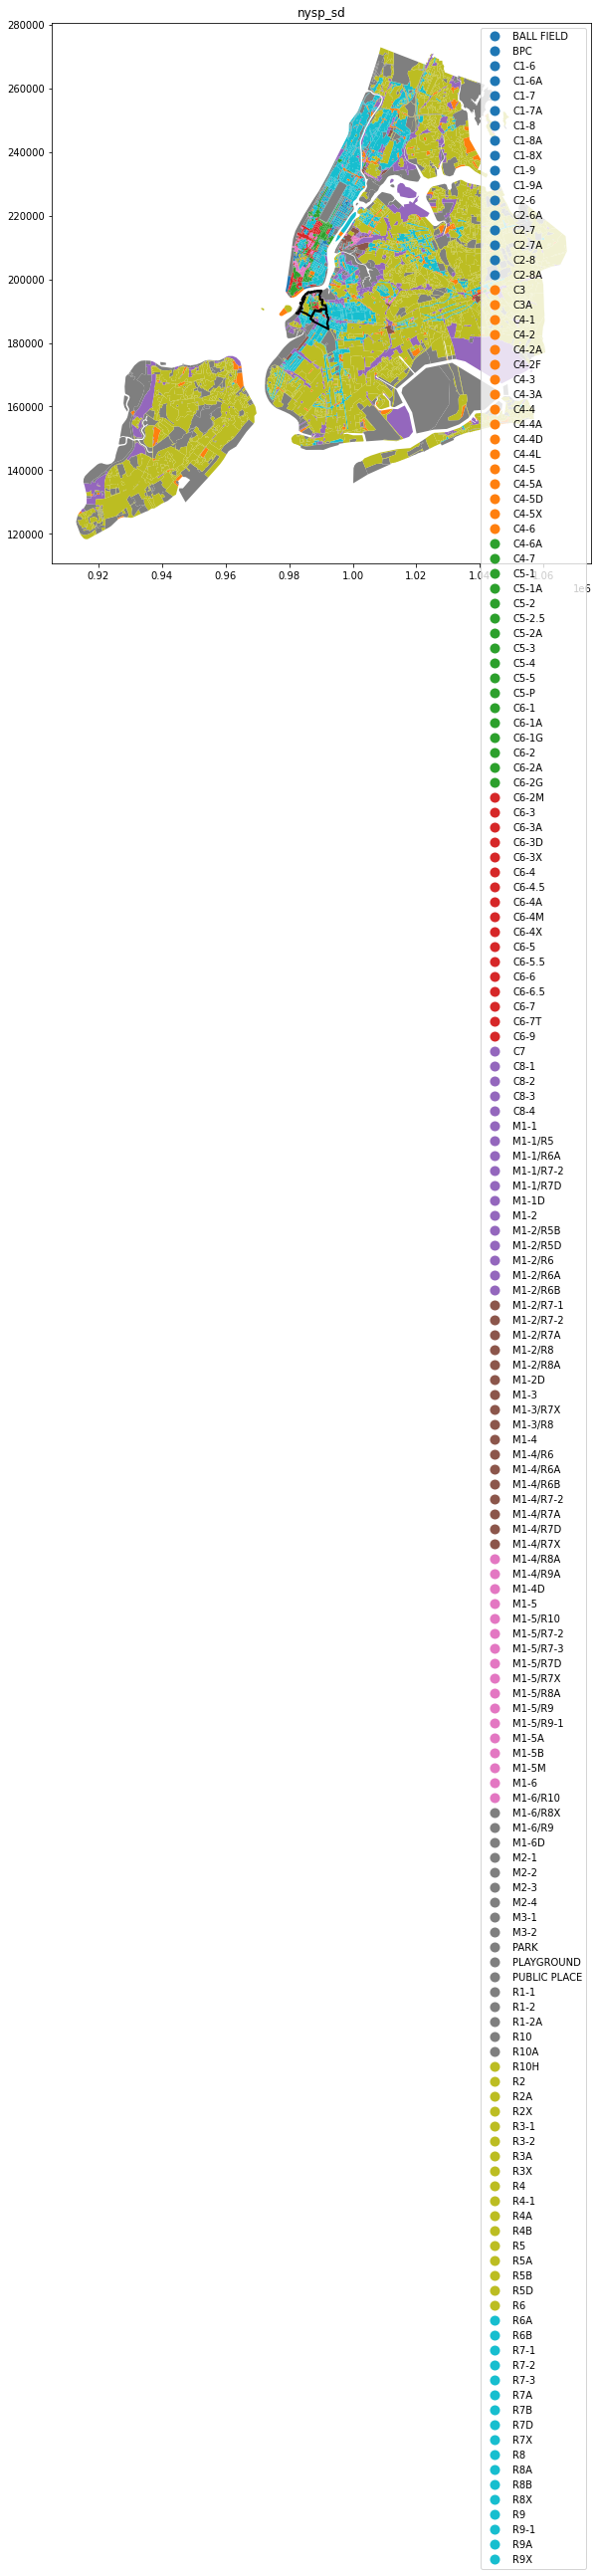

In [67]:
  fig, ax = plt.subplots(figsize = (10,10))
  plt.title(i)
  nyzd.plot(column = 'ZONEDIST',ax=ax,legend=True)
  boundaryDB.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)

In [15]:
taxlot.loc[(taxlot['Borough Code']==3)]

,Borough Code,Tax Block,Tax Lot,BBL,Zoning District 1,Zoning District 2,Zoning District 3,Zoning District 4,Commercial Overlay 1,Commercial Overlay 2,Special District 1,Special District 2,Special District 3,Limited Height District,Zoning Map Number,Zoning Map Code
90,3,133,5,3001330005,C6-4,NaN,NaN,NaN,NaN,NaN,DB,NaN,NaN,NaN,12D,NaN
91,3,422,66,3004220066,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16C,NaN
92,3,423,21,3004230021,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16C,NaN
93,3,428,12,3004280012,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16C,NaN
94,3,766,63,3007660063,R6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858422,3,8235,316,3082350316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23C,NaN
858423,3,8235,205,3082350205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23C,NaN
858424,3,8235,322,3082350322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23C,NaN
858431,3,8235,416,3082350416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23C,NaN
